## 各位同学好，这次作业我们来实践利用python的数据可视化

今天咱们要用到的数据还是NYSE的数据，没有数据的同学可以找班主任要哈，他那边有百度网盘~

这里展示的图片大家需要满足以下要求，每一个组图片按照以下要求给分：
1. 内容正确40%
2. 图标题、坐标轴标题清晰明了20%
3. 颜色选取清晰20% 
    > 注：对于有着不同意义的数据点要用**不同类型的点**做图例标注，避免歧义 `ax.set_prop_circle`, `sns.hls_palette`
4. 图片中信息分布合理20% 
    > 注：对于过分集中的数据采用对数坐标 `plt.gca().set_xscale`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 图1：用饼图表示NYSE数据中2015年净利润（Net Income）最多的100家公司的行业（GICS Sector）组成（30 分）

In [2]:
file1 = r'./fundamentals.csv'
file2 = r'./securities.csv'
data_fmt = pd.read_csv(file1)
data_sec = pd.read_csv(file2)
data_sec['Date first added'] = pd.to_datetime(data_sec['Date first added'], format = '%Y-%m-%d')

# 合并
merged = pd.merge(data_fmt, data_sec[['Ticker symbol','GICS Sector', 'Security']], 
                  left_on = 'Ticker Symbol', right_on = 'Ticker symbol', how = 'left')

# drop 掉重复列
merged = merged.drop('Ticker symbol', axis = 1)

# 提取2015的数据
merged = merged[merged['For Year'] == 2015.0]
merged = merged.sort_values('Net Income', ascending = 0)
merged.loc[:, ['Net Income', 'GICS Sector']].head()


,Net Income,GICS Sector
10,5.339400e+10,Information Technology
886,2.444200e+10,Financials
1685,2.289400e+10,Financials
691,1.810800e+10,Health Care
1669,1.787900e+10,Telecommunications Services


In [3]:
# 排序后 取前100数据
temp = merged[:100]
temp = temp.groupby('GICS Sector')['Security'].size() #计算每个sector有多少公司
temp = temp.to_frame().reset_index() 


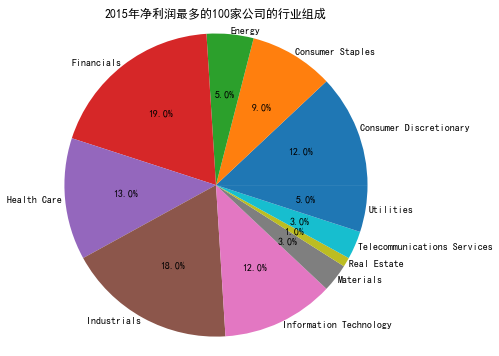

In [4]:
# 中文需要设置字体格式
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize= (6,6))

plt.pie(
    x = temp['Security'], 
    labels = temp['GICS Sector'],
    autopct="%1.1f%%",
    labeldistance = 1.02
)



plt.title("2015年净利润最多的100家公司的行业组成")
plt.axis('equal')

plt.show()


## 图2：在一张直方图中表示不同行业（GICS Sector）的营收（total revenue）分布（30 分）

In [57]:
# 预处理
temp2 = merged[['Total Revenue', 'GICS Sector']]
indexes = temp2['GICS Sector'].unique()

temp2 = temp2.reset_index()
temp2 = temp2.drop('index', axis = 1)
temp2.head()

,Total Revenue,GICS Sector
0,2.337150e+11,Information Technology
1,8.971600e+10,Financials
2,9.003300e+10,Financials
3,3.263900e+10,Health Care
4,1.316200e+11,Telecommunications Services


In [109]:
# 把所有sector的数据单独拎出来，存成np array arr
lst = []
for index in indexes:
    data = temp2[temp2['GICS Sector'] == index].iloc[:, 0]
    data = data.tolist()
    lst.append(data)

arr = np.array(lst)

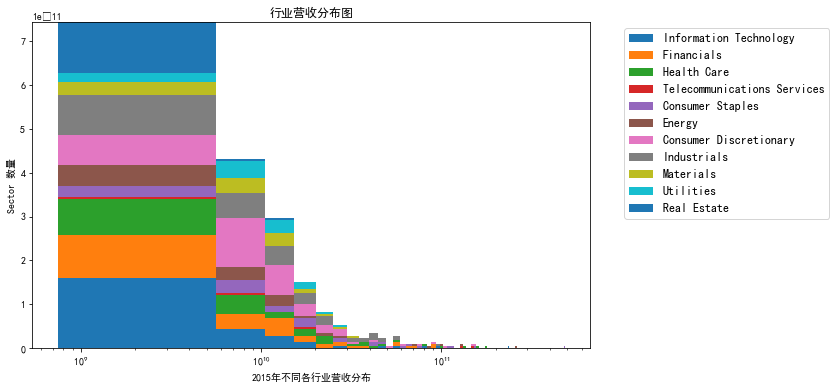

In [131]:
plt.rcParams['font.sans-serif'] = ['SimHei']


fig, ax = plt.subplots(figsize = (10, 6))


ax.hist(arr, bins = 100, density = True, histtype = 'bar', stacked = True, label = indexes)

plt.gca().set_xscale('log')

plt.plot()
plt.title("行业营收分布图")
plt.xlabel('2015年不同各行业营收分布')
plt.ylabel('Sector 数量')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, fontsize = 12)
plt.show()

## 图3：在一张二维散点图中表示不同行业的固定资产（Fixed Assets）/总资产（Total Assets）与盈利（Net Income）和营收(Total Revenue)的比例 （40 分）

In [10]:
import seaborn as sns
merged['Fixed Assets/Total Assets'] = merged['Fixed Assets'] / merged['Total Assets']
merged['Net Income/Total Revenue'] = merged['Net Income'] / merged['Total Revenue']

In [20]:
sns.set()

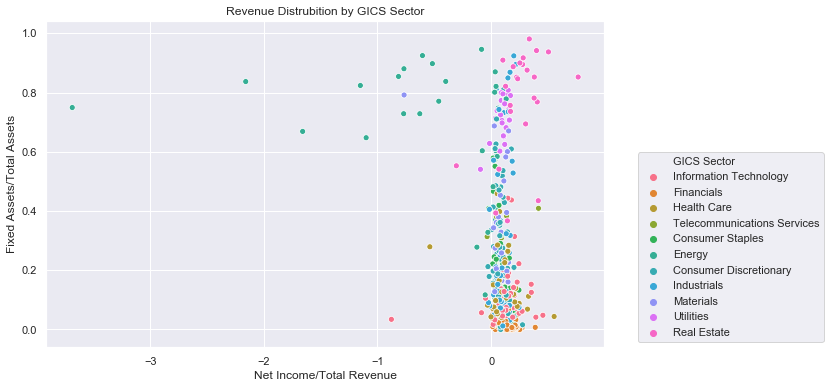

In [22]:
plt.figure(figsize = (10, 6))

sns.scatterplot(
    x = merged['Net Income/Total Revenue'], 
    y = merged['Fixed Assets/Total Assets'], 
    data = merged[['Net Income/Total Revenue', 'Fixed Assets/Total Assets']], 
    hue = merged['GICS Sector']
)

plt.title('Revenue Distrubition by GICS Sector')
plt.legend(bbox_to_anchor=(1.05, 0), loc=3)
plt.show()

